<a href="https://colab.research.google.com/github/scaomath/wustl-math450/blob/main/Math_450_Notebook_4_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding lecture 4 of Math 450

Overall goal of the our class: make us learn machine learning in torch package.
- Build our own neural net using Torch's LEGO-like blocks.
- Write torch-like code from scratch.
- Write our own optimizer.

## Today's goal

- Explore MNIST dataset.
- Generator, iterator, `iter()` and `next()`
- `enumerate`.
- f-string and `with`.

## Dataset


"MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike."

Read more:[https://www.kaggle.com/c/digit-recognizer](https://www.kaggle.com/c/digit-recognizer)


<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>


---- 
This code is adopted from the pytorch examples repository. 
It is licensed under BSD 3-Clause "New" or "Revised" License.
Source: https://github.com/pytorch/examples/
LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

In [20]:
import numpy as np
import torch

# import torchvision 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

# import packages that help us plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [11]:
# download the data
train = datasets.MNIST('../data', train=True, download=True, transform = transforms.ToTensor())

## Dataloader in torch

- Dataloader is a generator.

In [9]:
# put the data into a loader, every iteration 1 sample is loaded
train_loader = DataLoader(train, batch_size=1, shuffle=True, num_workers=2,)

In [29]:
data_iter = iter(train_loader) # set the loader to be an iterator
images, labels = next(data_iter) # next returns the next item in an iterator

## Generator simple example

- Key word `yield` is like `return` but the function is now a generator.
- Generator loads data into memory whenever needed, instead of all of them at once.

In [12]:
def sequence():
    n = 0
    while True:
        yield n
        n += 1

In [ ]:
for i in sequence():
  print(i, end=" ") # do not attempt this at your local computer

In [16]:
f = sequence() # what type is this "function"

In [25]:
# simple iterator example using a torch tensor
x = torch.randn(10,2)

## Visualize what is `image`

In [31]:
images.shape

torch.Size([1, 1, 28, 28])

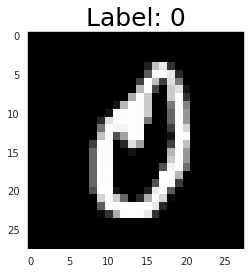

In [32]:
image = images[0].squeeze()
label = labels.squeeze()
_, ax = plt.subplots(1)
ax.imshow(image, cmap='gray'); 
ax.set_title(f'Label: {label}', color= 'black', fontsize=25);

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


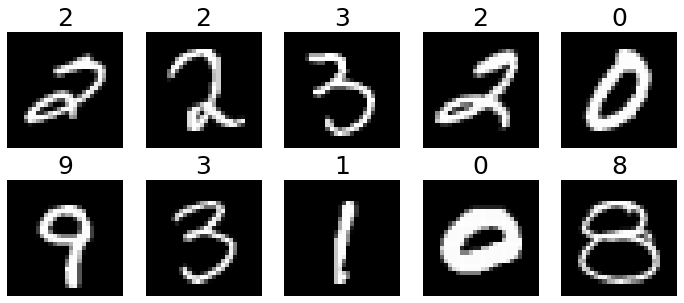

In [52]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
indices = np.random.randint(0,len(train),size=10)
for i, idx in enumerate(indices):
    X = train.train_data[idx].clone().detach()/255
    y = train.train_labels[idx]
    axes[i].imshow(X, cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y)), color= 'black', fontsize=25)
plt.show()

## Choose a single number sample

In [44]:
idx = (train.train_labels==7)
labels_new = train.train_labels[idx]
data = train.train_data[idx].clone().detach()/255

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [46]:
n_data_all = len(data)
idx = np.random.choice(range(n_data_all), size=10)
data_new = data[idx]

torch.Size([10, 28, 28])


## Example of enumerate
- `enumerate` is built-in counter function for iterations.

In [53]:
# example of manual counter
samples = data[:10]

## Resize the MNIST data

- Reshape each sample into a vector that a neural network can take as an input (later we will have a convolutional NN that takes images as inputs). 

In [ ]:
# demo a single image

In [54]:
# demo a batch

## Context

In homework 2, we will see a keyword:
```python
with torch.no_grad():
    blahblahblah
```

What is this `with` keyword here?

- Example build a simple timer wrapper using the context manager decorator.

In [58]:
from contextlib import contextmanager
from time import time

In [67]:
@contextmanager
def timer(task_name):
    start = time()
    yield None
    print(f"{task_name} - done in {time() - start:.6f} seconds. \n")

In [65]:
# demo the matrix-vector multiplication
A = torch.randn(10000, 5)
b = torch.randn(5, 1)

## Sharing my own fancy timer function

Reference:
- https://stackoverflow.com/questions/552744/how-do-i-profile-memory-usage-in-python

In [76]:
import psutil
import os
import math

class Colors:
    """Defining Color Codes to color the text displayed on terminal.
    """

    blue = "\033[94m"
    green = "\033[92m"
    yellow = "\033[93m"
    magenta = "\033[95m"
    red = "\033[91m"
    end = "\033[0m"

def color(string: str, color: Colors = Colors.yellow) -> str:
    return f"{color}{string}{Colors.end}"


@contextmanager
def fancy_timer(label: str, compact=False) -> None:
    '''
    print 
    1. the time the code block takes to run
    2. the memory usage.
    '''
    p = psutil.Process(os.getpid())
    m0 = p.memory_info()[0] / 2. ** 30
    start = time()  # Setup - __enter__
    if not compact:
        print(color(f"{label}: start at {start:.2f};", color=Colors.blue))
        print(color(f"LOCAL RAM USAGE AT START: {m0:.2f} GB" , color=Colors.green))
        try:
            yield  # yield to body of `with` statement
        finally:  # Teardown - __exit__
            m1 = p.memory_info()[0] / 2. ** 30
            delta = m1 - m0
            sign = '+' if delta >= 0 else '-'
            delta = math.fabs(delta)
            end = time()
            print(color(f"{label}: done at {end:.2f} ({end - start:.6f} secs elapsed);", color=Colors.blue))
            print(color(f"LOCAL RAM USAGE AT END: {m1:.2f}GB ({sign}{delta:.2f}GB)", color=Colors.green))
            print('\n')
    else:
        yield
        print(color(f"{label} - done in {time() - start:.6f} seconds. \n", color=Colors.blue))